In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
data = pd.read_csv("A:/AI_PROJECT/all_algo_code/type of the Diamond new.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
data.isnull().sum()

cut              0
color            0
clarity          0
carat            0
depth            0
table            0
price            0
x (Premium)      0
z (Very Good)    0
y (Good)         0
dtype: int64

In [14]:
data.duplicated().sum()

np.int64(146)

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

np.int64(0)

In [19]:
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

In [20]:
data.head()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,0,1,5,0.22,65.1,61.0,337,3.87,2.49,3.78
1,0,1,3,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,0,2,3,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,0,2,5,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,0,2,5,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [21]:
data.describe()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,53794.000000,53794.000000,53794.000000,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,2.553947,2.593914,3.835762,0.79778,61.748080,57.458109,3933.065082,5.731214,3.538714,5.734653
std,1.027569,1.701117,1.724872,0.47339,1.429909,2.233679,3988.114460,1.120695,0.705037,1.141209
min,0.000000,0.000000,0.000000,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,0.40000,61.000000,56.000000,951.000000,4.710000,2.910000,4.720000
50%,2.000000,3.000000,4.000000,0.70000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,3.000000,4.000000,5.000000,1.04000,62.500000,59.000000,5326.750000,6.540000,4.030000,6.540000
max,4.000000,6.000000,7.000000,5.01000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


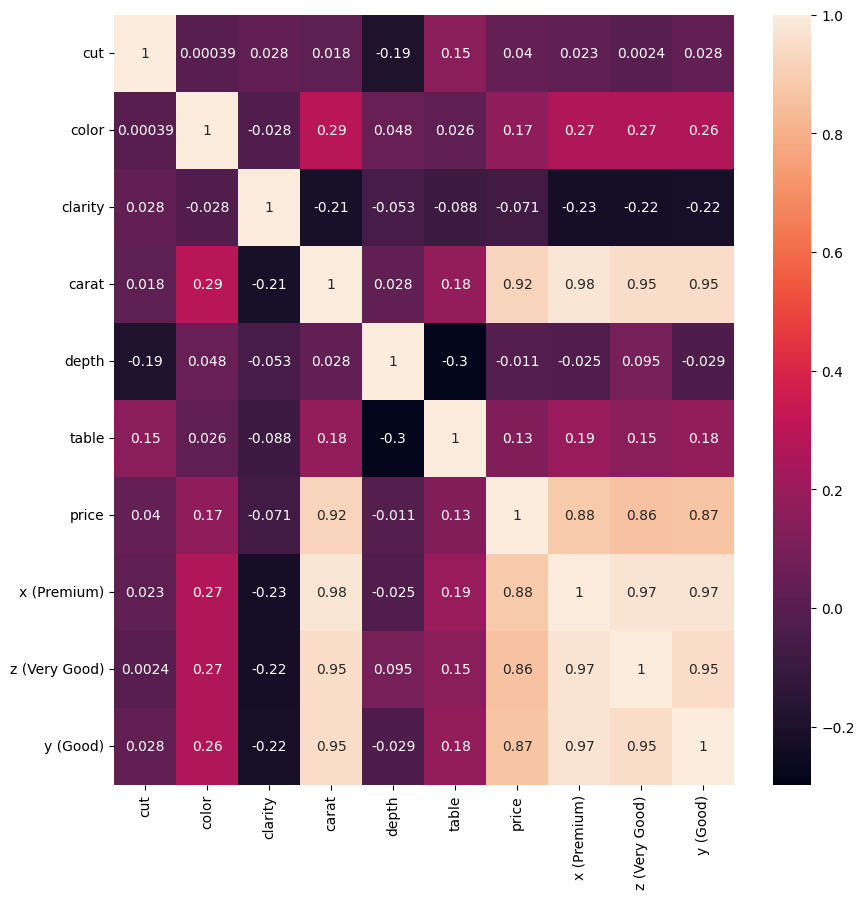

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [25]:
X = data.drop(['price'],axis=1)
y = data['price']

In [36]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
ss= StandardScaler()
x_train_ss=ss.fit_transform(X_train)
x_test_ss = ss.transform(X_test)

In [42]:
models = {
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "LinearRegression":LinearRegression()
}

In [43]:
for name,model in models.items():
    model.fit(x_train_ss,y_train)
    y_pred = model.predict(x_test_ss)
    accuracy = r2_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")

RandomForestRegressor
98.09101936803691
AdaBoostRegressor
87.8365262987633
GradientBoostingRegressor
97.10282904613352
LinearRegression
87.94151773697457


In [44]:
result = {
    "Models":["RF","AdaBoostRegressor","GradientBoostingRegressor","LinearRegression"],
    "accuracy":[98.09,87.83,97.10,87.94]
}

In [45]:
result = pd.DataFrame(result)

In [46]:
result

,Models,accuracy
0,RF,98.09
1,AdaBoostRegressor,87.83
2,GradientBoostingRegressor,97.10
3,LinearRegression,87.94


([0, 1, 2, 3],
 [Text(0, 0, 'RF'),
  Text(1, 0, 'AdaBoostRegressor'),
  Text(2, 0, 'GradientBoostingRegressor'),
  Text(3, 0, 'LinearRegression')])

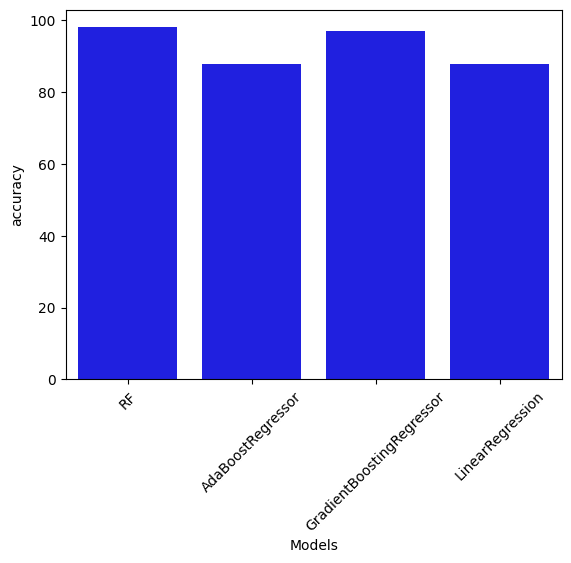

In [55]:
sns.barplot(data=result, x='Models', y='accuracy',color='Blue')
plt.xticks(rotation=45)